# Introduction

<FONT size="4p">In this exercice I will pursuit a Data Science process to build and deploy a Machine Learning Model that can predict a house price, by following the steps below:</FONT>

<ol>
  <li>Loading Data</li>
  <li>Data preprocessing and cleaning</li>
  <li>Data exploration and visualisation</li>
  <li>Data modeling</li>
    <li>Evaluating the model</li>
</ol>

In [1]:
#The installation of seaborn package will take few time
import pip
pip.main(['install','seaborn'])
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Pretty display for notebooks
%matplotlib inline

  Using cached https://files.pythonhosted.org/packages/c5/88/b8659eecde0350d37d5b47c1c2a88f39e6153e5809bcfc48bb7fde6f231b/pandas-0.24.1-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/81/39/f1457091d0a45a84a2bd7815e2cf6bd45d4fe240728e9ed567cbb17c8abe/scipy-1.2.1-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/59/08/04933377dc4500e3698e93f9113dc3624874e0914f4c85767ecb5b389084/matplotlib-2.2.3-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/e0/b5/63b79fe426433fa1cd110eb04a94ec0c6967e56e5f57c98caf455a5fb6e2/numpy-1.16.1-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/61/28/1d3920e4d1d50b19bc5d24398a7cd85cc7b9a75a490570d5a30c57622d34/pytz-2018.9-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/41/17/c62faccbfbd163c7f57f3844689e3a78bae1f403648a6afb1d0866d87fbb/python_dateutil-2.8.0-py2.py3-none-any.whl


In [2]:
#Load the data
data = pd.read_csv('/home/hosni/Downloads/housing.csv',delimiter=";")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 13 columns):
Unnamed: 0    546 non-null int64
price         546 non-null float64
lotsize       546 non-null int64
bedrooms      546 non-null int64
bathrms       546 non-null int64
stories       546 non-null int64
driveway      546 non-null object
recroom       546 non-null object
fullbase      546 non-null object
gashw         546 non-null object
airco         546 non-null object
garagepl      546 non-null int64
prefarea      546 non-null object
dtypes: float64(1), int64(6), object(6)
memory usage: 55.5+ KB


<FONT size="4p">Our housing dataset in composed of 546 observations and 12 features : 6 of type integer (Unnamed: 0,lotsize,bedrooms,bathrms,stories,garagepl), 6 of type object (driveway,recroom,fullbase,gashw,airco,prefarea) and one of type float (price).
PS: Unnamed: 0 is a column that contains the index of observations so we don't need it and we will drop it</FONT>

In [4]:
data.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [5]:
prices = data['price']

In [6]:
prices.head()

0    42000.0
1    38500.0
2    49500.0
3    60500.0
4    61000.0
Name: price, dtype: float64

In [7]:
# Success
print 'Housing dataset has {0} data points with {1} variables each'.format(*data.shape)

Housing dataset has 546 data points with 13 variables each


In [8]:
data_cleaned = data.drop('Unnamed: 0', axis = 1)

In [9]:
features = data_cleaned.drop('price', axis = 1)

In [10]:
features.head()

,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,5850,3,1,2,yes,no,yes,no,no,1,no
1,4000,2,1,1,yes,no,no,no,no,0,no
2,3060,3,1,1,yes,no,no,no,no,0,no
3,6650,3,1,2,yes,yes,no,no,no,0,no
4,6360,2,1,1,yes,no,no,no,no,0,no


In [11]:
features['driveway'] = features['driveway'].map({'yes': 1, 'no': 0})
features['recroom'] = features['recroom'].map({'yes': 1, 'no': 0})
features['fullbase'] = features['fullbase'].map({'yes': 1, 'no': 0})
features['gashw'] = features['gashw'].map({'yes': 1, 'no': 0})
features['airco'] = features['airco'].map({'yes': 1, 'no': 0})
features['prefarea'] = features['prefarea'].map({'yes': 1, 'no': 0})

In [12]:
features.head()

,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,5850,3,1,2,1,0,1,0,0,1,0
1,4000,2,1,1,1,0,0,0,0,0,0
2,3060,3,1,1,1,0,0,0,0,0,0
3,6650,3,1,2,1,1,0,0,0,0,0
4,6360,2,1,1,1,0,0,0,0,0,0


In [13]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)
# Alternative using pandas
# minimum_price = prices.min()

# TODO: Maximum price of the data
maximum_price = np.max(prices)
# Alternative using pandas
# maximum_price = prices.max()

# TODO: Mean price of the data
mean_price = np.mean(prices)
# Alternative using pandas
# mean_price = prices.mean()

# TODO: Median price of the data
median_price = np.median(prices)
# Alternative using pandas
# median_price = prices.median()

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)
# Alternative using pandas 
# std_price = prices.std(ddof=0)

# There are other statistics you can calculate too like quartiles
first_quartile = np.percentile(prices, 25)
third_quartile = np.percentile(prices, 75)
inter_quartile = third_quartile - first_quartile

# Show the calculated statistics
print "Statistics for housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)
print "First quartile of prices: ${:,.2f}".format(first_quartile)
print "Second quartile of prices: ${:,.2f}".format(third_quartile)
print "Interquartile (IQR) of prices: ${:,.2f}".format(inter_quartile)

Statistics for housing dataset:

Minimum price: $25,000.00
Maximum price: $190,000.00
Mean price: $68,121.60
Median price $62,000.00
Standard deviation of prices: $26,678.21
First quartile of prices: $49,125.00
Second quartile of prices: $82,000.00
Interquartile (IQR) of prices: $32,875.00


Let's visualize the distribution of house price by their lot size, and look how it behaves

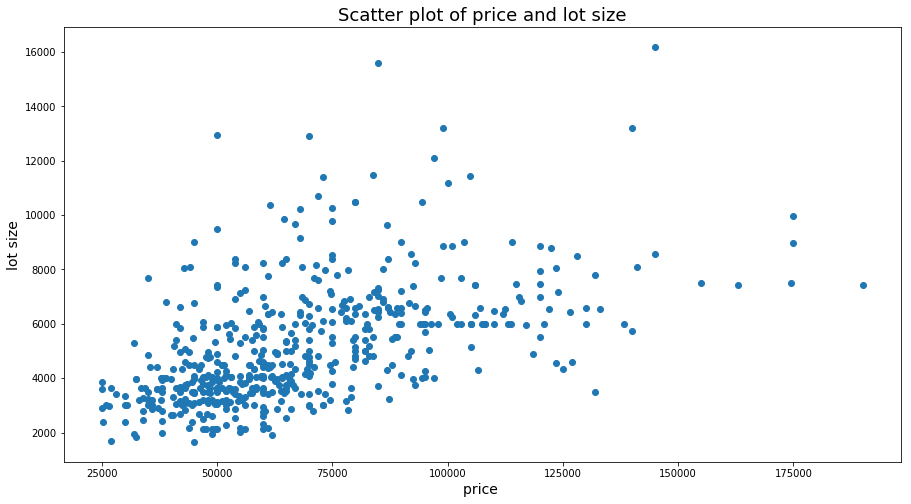

In [14]:
# here we set the figure size to 15x8
plt.figure(figsize=(15, 8))
# plot two values price per lot size
plt.scatter(data_cleaned.price, data_cleaned.lotsize)
plt.xlabel("price ", fontsize=14)
plt.ylabel("lot size", fontsize=14)
plt.title("Scatter plot of price and lot size",fontsize=18)
plt.show()

<FONT size="4p">As we can see from the plot above, the house price increase respectivly by the lot size, and more generally we can say that the more the lot size augment, the price augment too, while in the some cases the bigger lot size still have a medium price, and this is totally logical since whenever a large lot size doesn't mean that it will have the highest price due to other features.</FONT>

Let's visualize the distribution of houses price by their number of bedrooms, and look how it behaves.

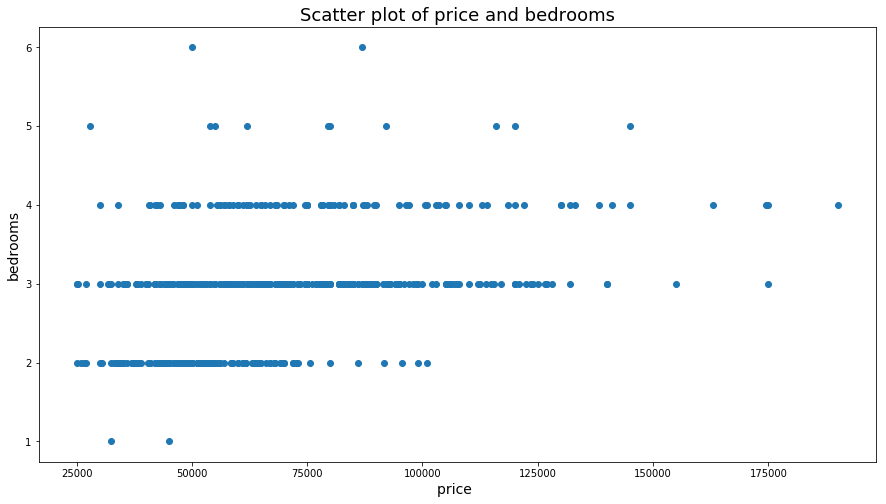

In [15]:
# here we set the figure size to 15x8
plt.figure(figsize=(15, 8))
# plot two values price per lot size
plt.scatter(data_cleaned.price, data_cleaned.bedrooms)
plt.xlabel("price ", fontsize=14)
plt.ylabel("bedrooms", fontsize=14)
plt.title("Scatter plot of price and bedrooms",fontsize=18)
plt.show()

<FONT size="4p">The above plot indicate that there's a repartition of prices depends on bedroom's number: for 1 or 6 bedrooms house's price is between 25000 and 80000 but for 3 or 4 bedrooms the price is so various which indicates that houses with 2 or 3 or 4 have more percentage to be selled than those with 1 or 5 or 6 bedrooms.</FONT>

Let's visualize the distribution of houses price by their number of bathrooms, and look how it behaves.

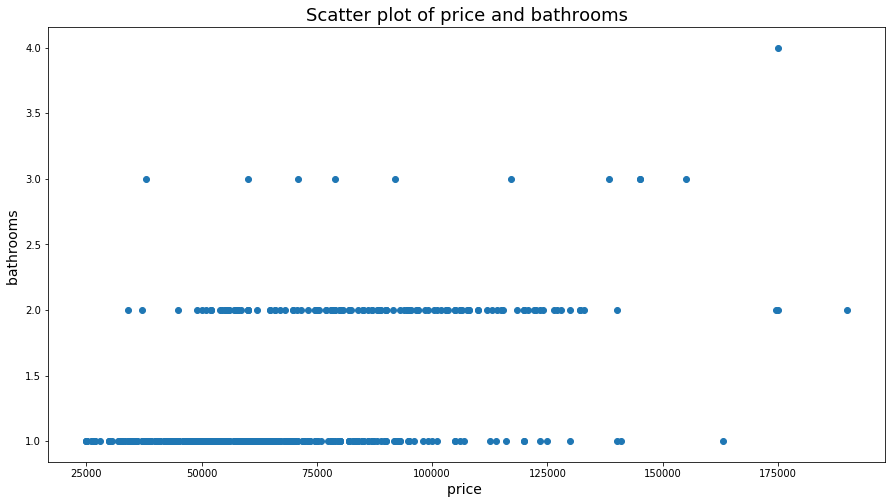

In [16]:
# here we set the figure size to 15x8
plt.figure(figsize=(15, 8))
# plot two values price per lot size
plt.scatter(data_cleaned.price, data_cleaned.bathrms)
plt.xlabel("price ", fontsize=14)
plt.ylabel("bathrooms ", fontsize=14)
plt.title("Scatter plot of price and bathrooms",fontsize=18)
plt.show()

<FONT size="4p">The above plot indicate that there's a repartition of prices depends on bathroom's number: for 1 or 2 bathrooms house's price is between 20000 and 190000 but for 3 or 4 bedrooms the price is so various which indicates that houses with 1 or 2 bathrooms have more percentage to be selled than those with 3 or 4 bathrooms.</FONT>

Let's visualize the distribution of houses price by their number of stories, and look how it behaves.

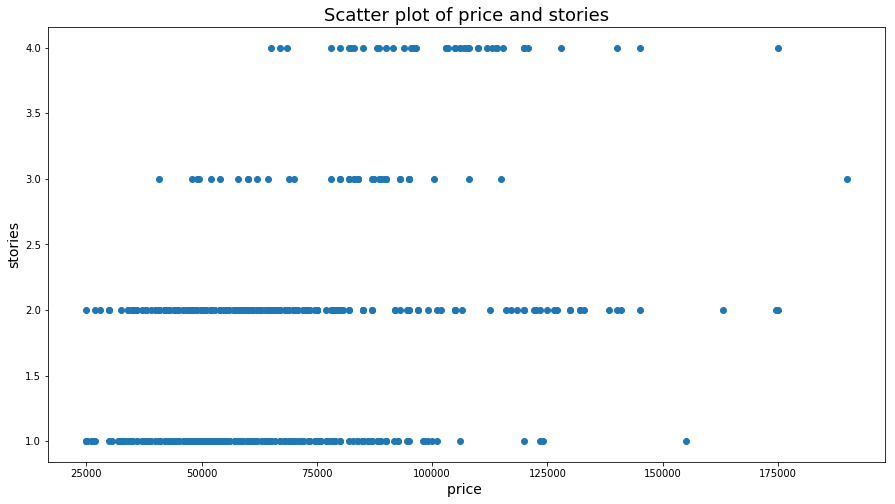

In [17]:
# here we set the figure size to 15x8
plt.figure(figsize=(15, 8))
# plot two values price per lot size
plt.scatter(data_cleaned.price, data_cleaned.stories)
plt.xlabel("price ", fontsize=14)
plt.ylabel("stories", fontsize=14)
plt.title("Scatter plot of price and stories",fontsize=18)
plt.show()

Let's visualize the distribution of house price by their lot size, and look how it behaves.

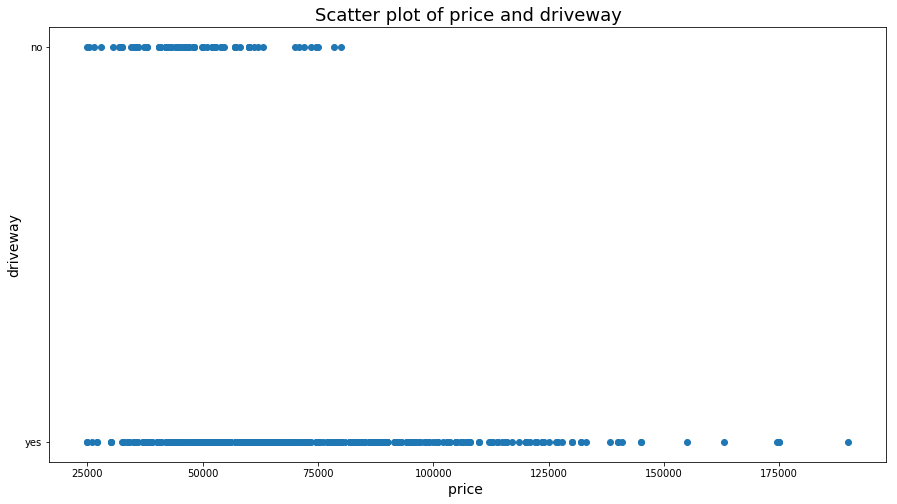

In [18]:
# here we set the figure size to 15x8
plt.figure(figsize=(15, 8))
# plot two values price per lot size
plt.scatter(data_cleaned.price, data_cleaned.driveway)
plt.xlabel("price ", fontsize=14)
plt.ylabel("driveway", fontsize=14)
plt.title("Scatter plot of price and driveway",fontsize=18)
plt.show()

<FONT size="4p">As we can see from the plot above,there is a variety in house's price depends on the existence of a driveway or not :we can categorise them into two groups ; house's between 25000 and nearly 80000 and the other group is higher than 80000.</FONT>

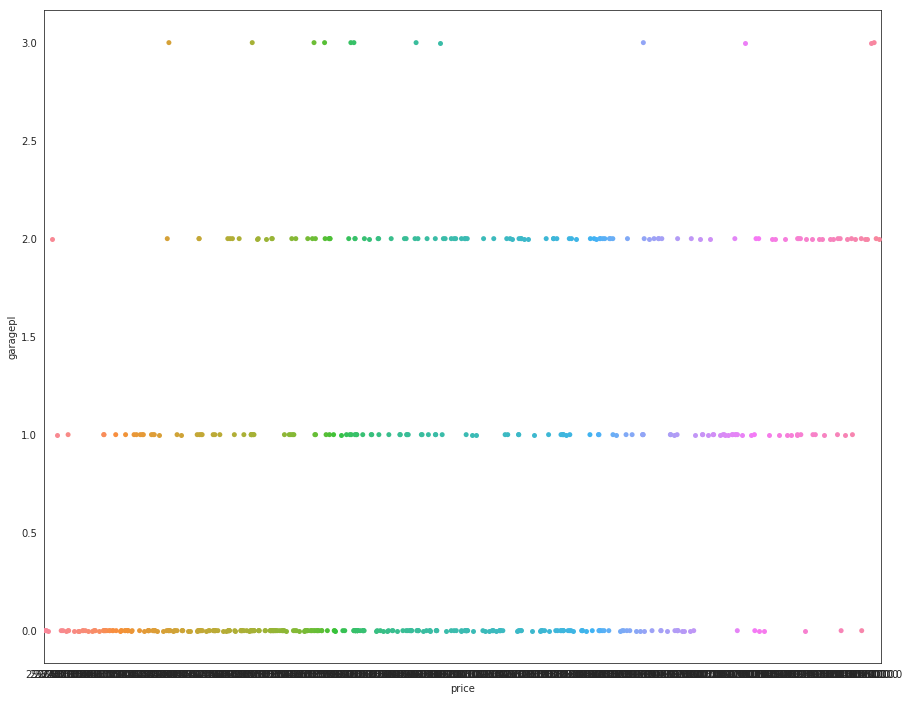

In [19]:
import matplotlib.pyplot as plt
import seaborn
from seaborn import *
seaborn.set_style("white")
f, ax = plt.subplots(figsize=(15, 12))
seaborn.stripplot(data = data_cleaned, x='price', y='garagepl', jitter=.5)
plt.show()

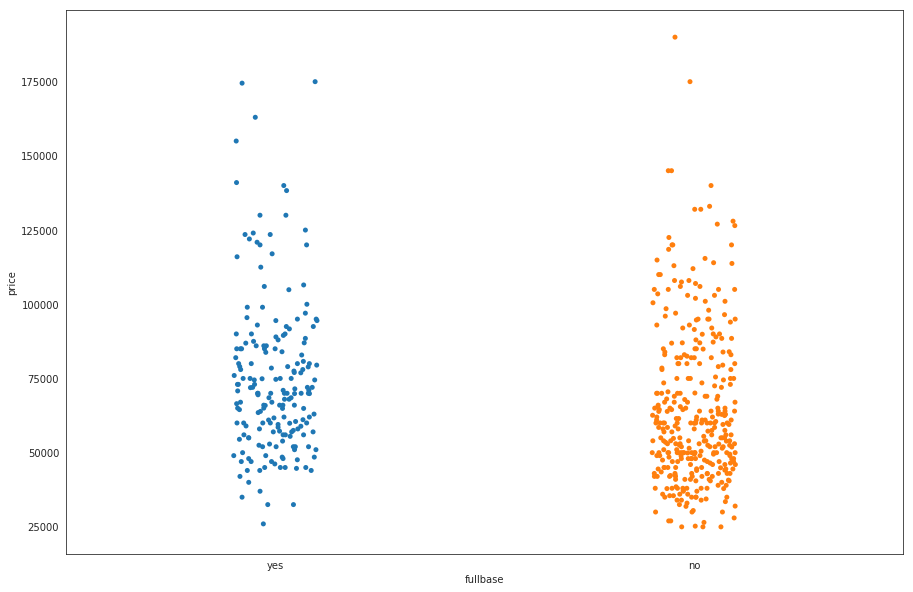

In [20]:
f, ax = plt.subplots(figsize=(15, 10))
seaborn.stripplot(data = data_cleaned, x='fullbase', y='price', jitter=.1)
plt.show()

<FONT size="4p">Some Insights with Violin plot. This chart is a combination of a Box Plot and a Density Plot that is rotated and placed on each side, to show the distribution shape of the data.</FONT>

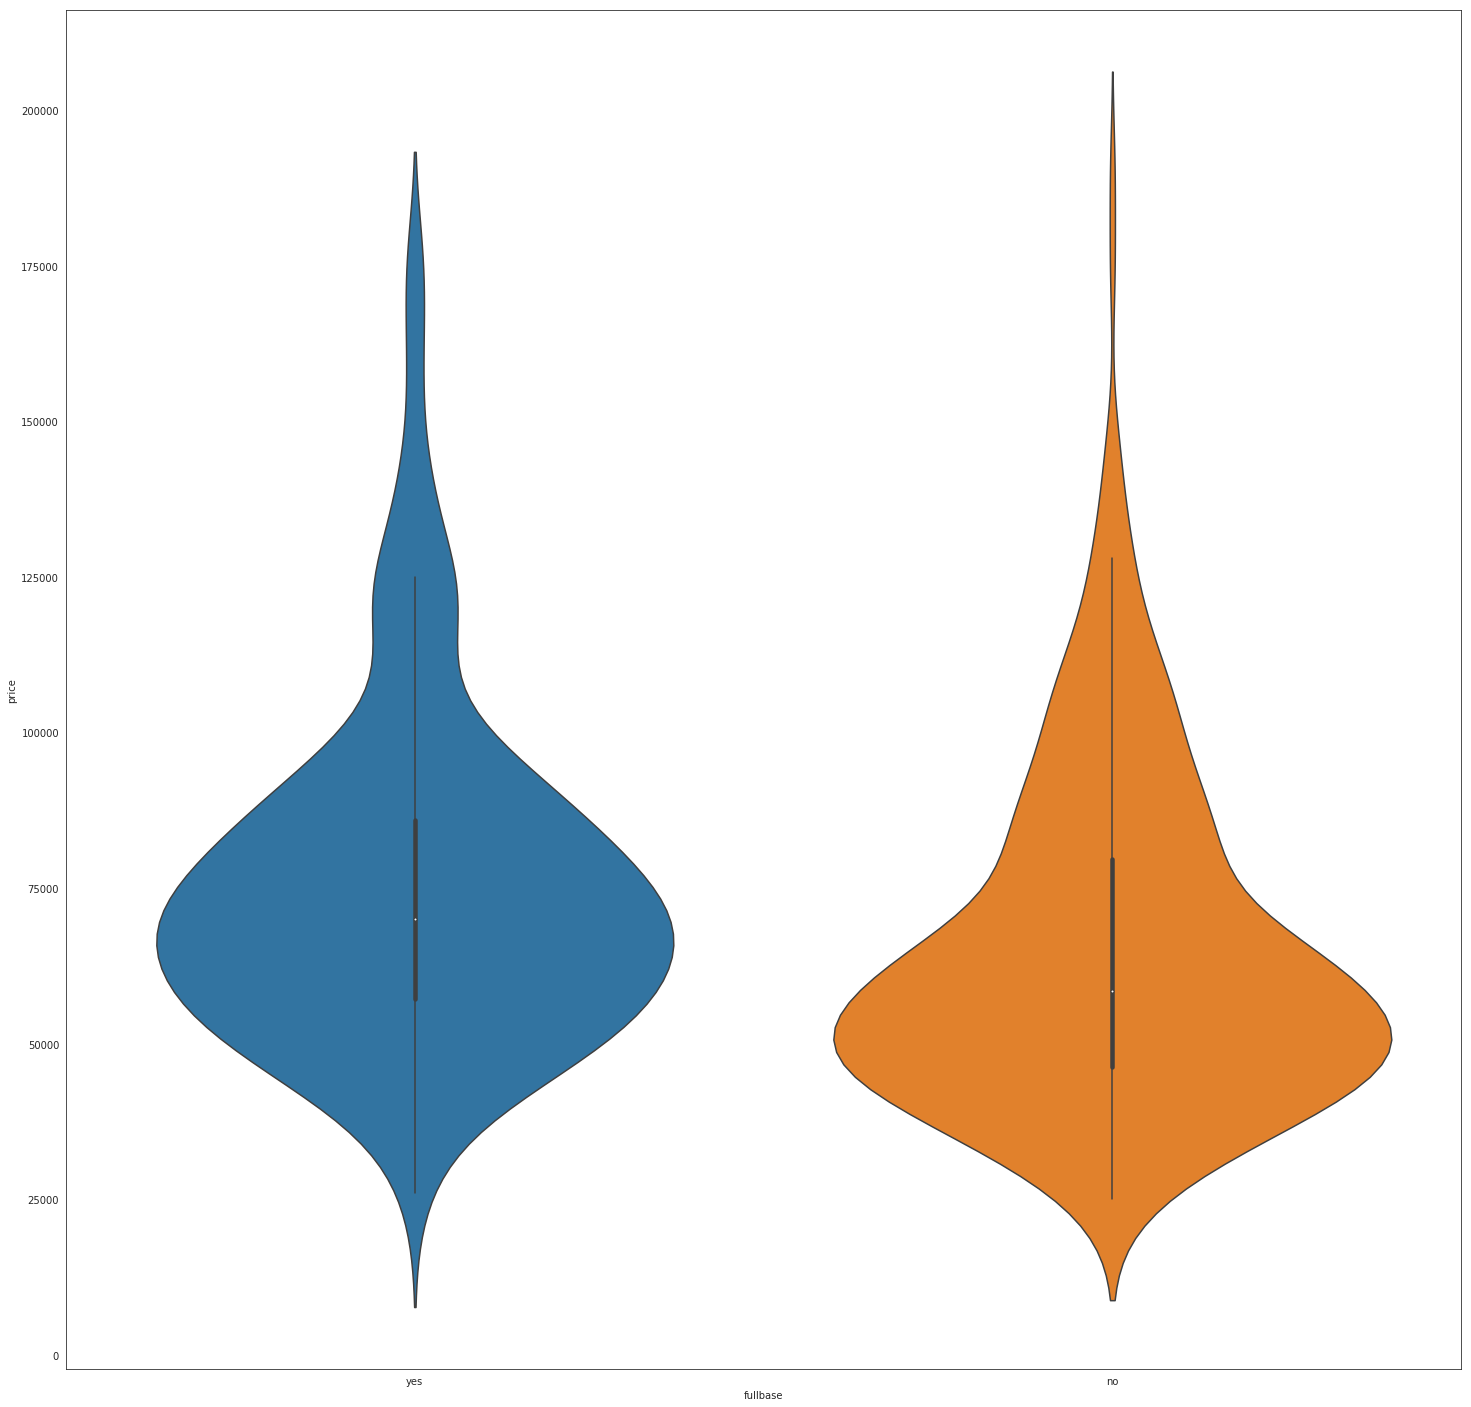

In [21]:
f, ax = plt.subplots(figsize=(25, 25))
seaborn.violinplot(data = data_cleaned, x='fullbase', y='price')
plt.show()

<FONT size="4p">From the plot above, we can clearly visualise a lot of information such as the minimum, maximum price for houses and also get perception on the Median values, but more particularly what we got in violin plot other than teh box plot, is the density plot width known as Kernel Density Plots.</FONT>

# <FONT color="fuchsia">Correlation Matrix</FONT>

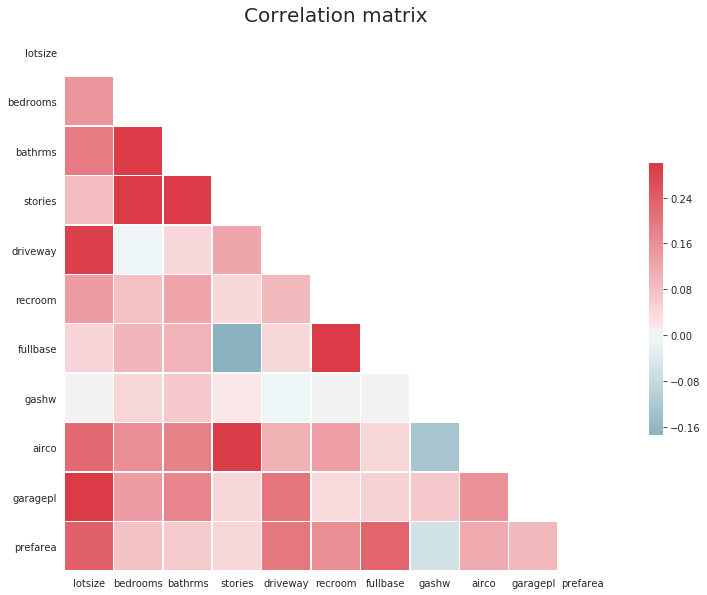

In [22]:
# Generate a custom diverging colormap
cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))
# Compute the correlation matrix
corr = features.corr()
#print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask and correct aspect ratio
seaborn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation matrix', fontsize = 20)
plt.show()

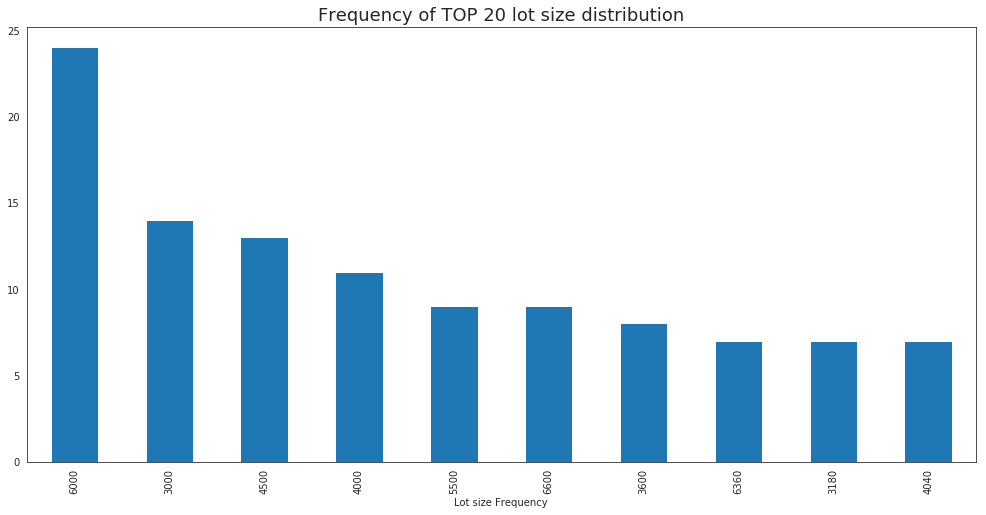

In [23]:
plt.figure(figsize=(17,8))
data_cleaned.lotsize.value_counts().nlargest(10).plot(kind='bar')
plt.xlabel('Lot size Frequency')
plt.title("Frequency of TOP 20 lot size distribution",fontsize=18)
plt.show()

<G><I><FONT size="20">Data Modeling</FONT></I></G>

# <FONT color="fuchsia">KNN Regression</FONT>

<FONT size="4p">For the moment we will use the K nearset neighbors regressor model with its numerical features, to get a basic view on our model how it behaves.</FONT>

# Data Splitting

<FONT size="4p">Usually we split our data into three parts : Training , validation and Testing set, but for simplicity we will use only train and test with 20% in test size.</FONT>

In [24]:
# now we use the train_test_split function already available in sklearn library to split our data set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, prices, test_size = .20, random_state = 42)

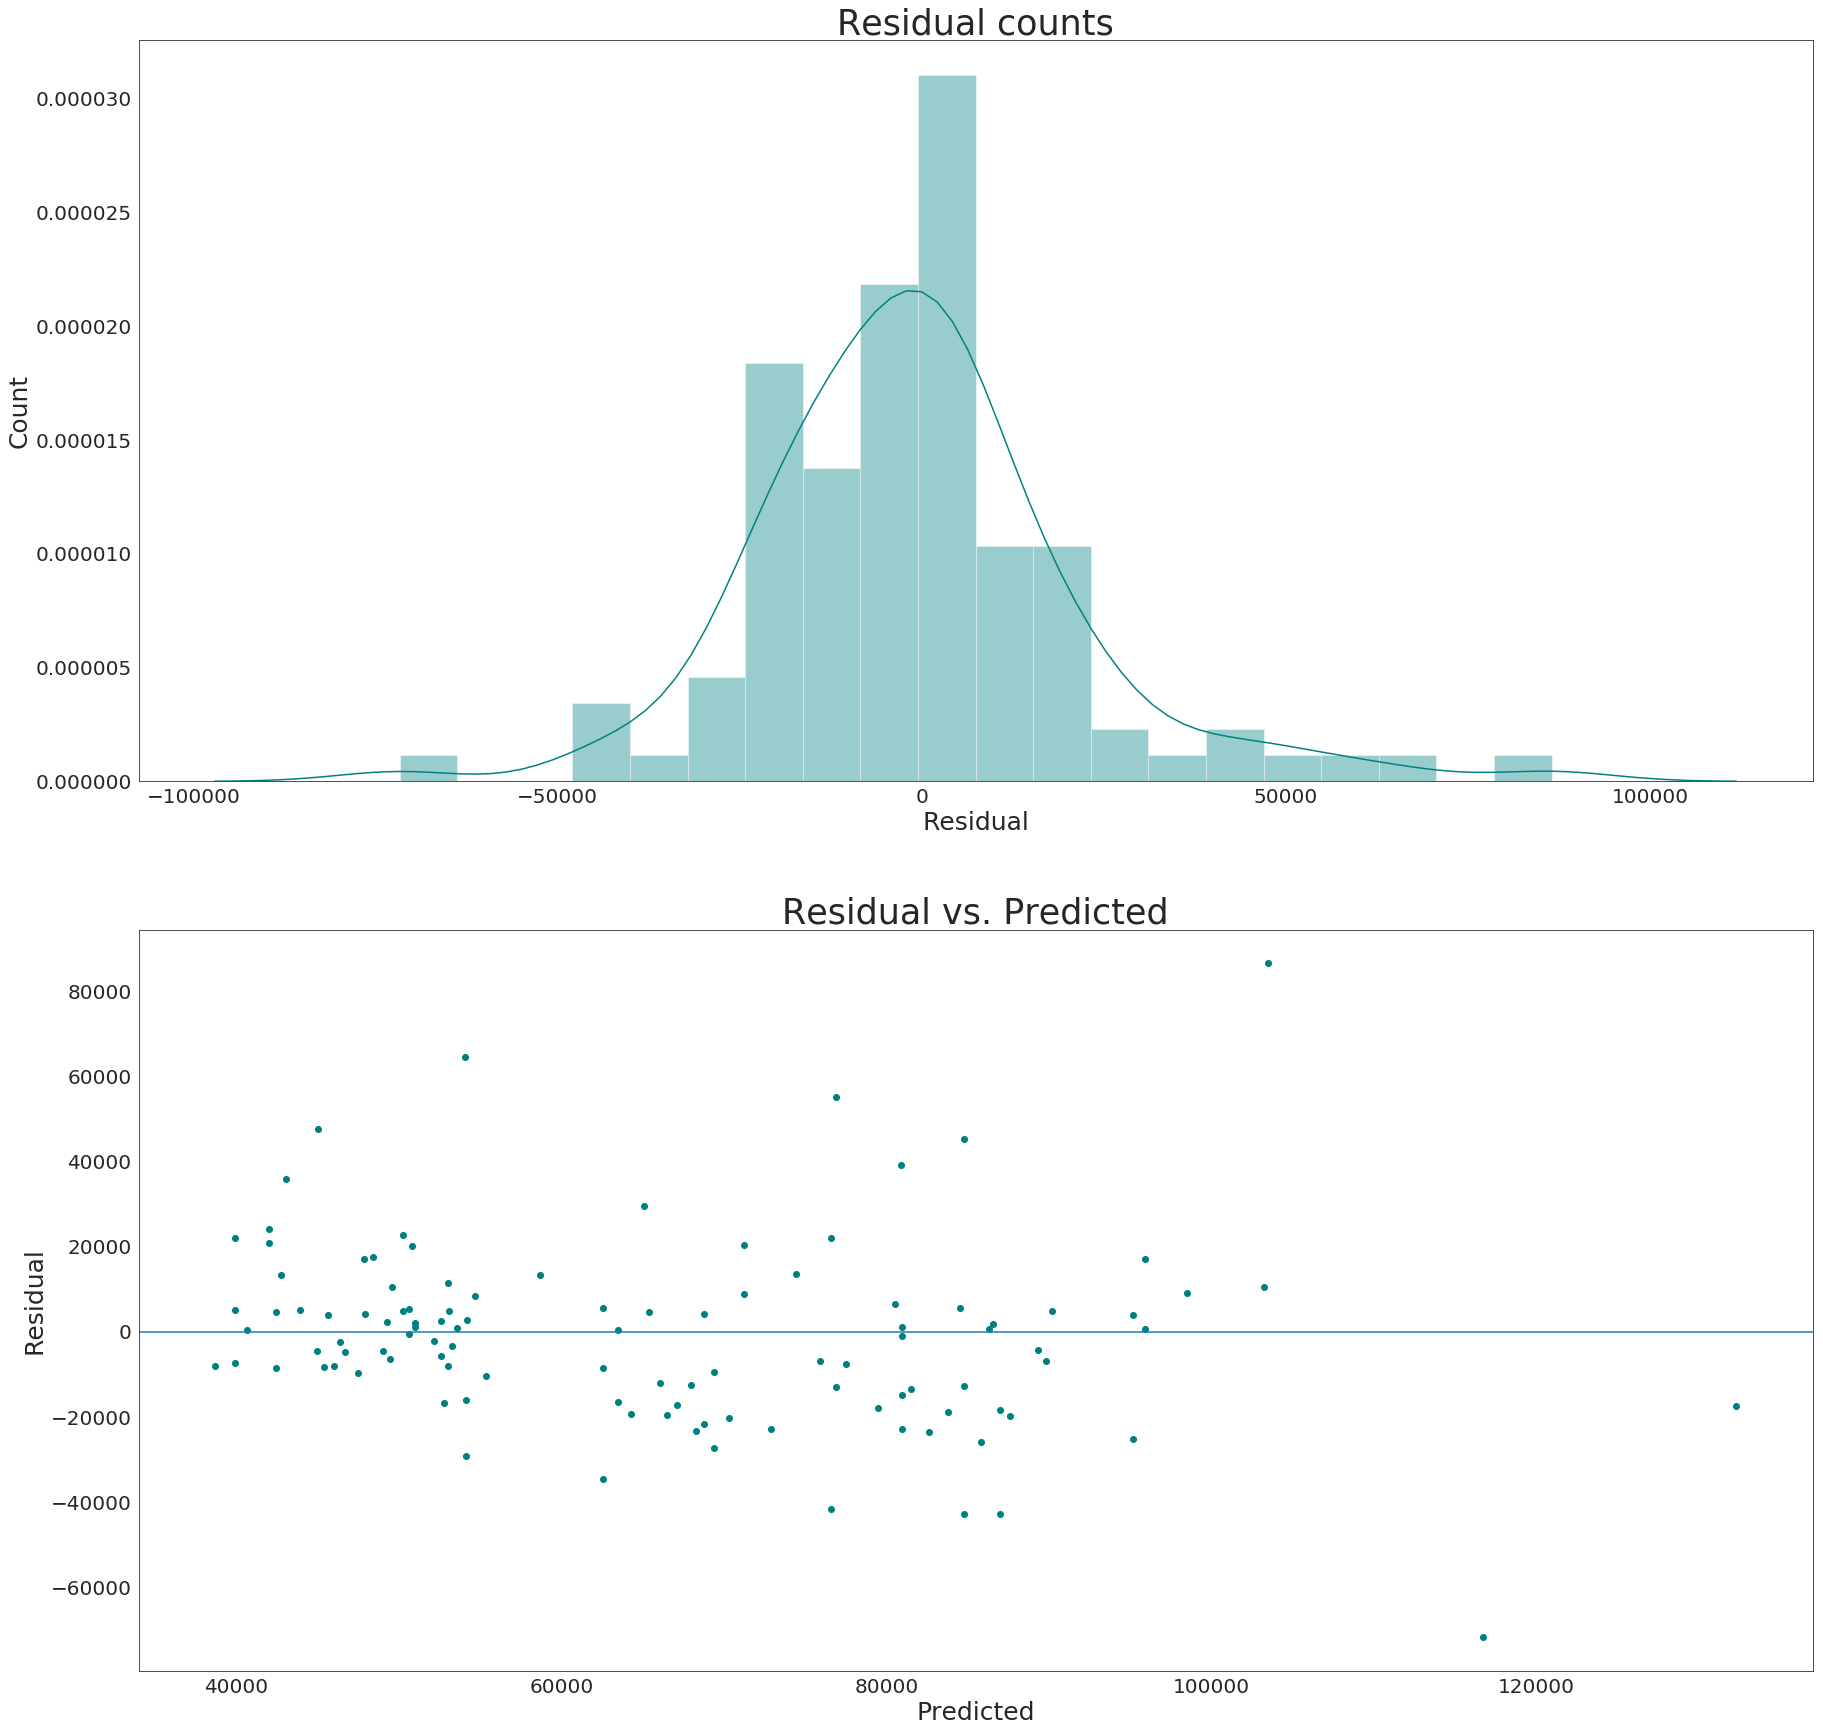

RMSE:
21684.49451431724


In [25]:
from sklearn import neighbors
# the value of n_neighbors will be changed when we plot the histogram showing the lowest RMSE value
knn = neighbors.KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, Y_train)

predicted = knn.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
seaborn.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [26]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.30


<FONT size="4p">As we can see we got 30% in the r^2 score by using n_neighbors = 5, we still don't know if it's the optimal number of neighors or not, so for that we will plot a histogram of different Root Mean Squared Error by n_neighbors and see who's have the lowest RMSE value, and another thing is that the mean of cross validation values is very low which may indicate that our model had overfitted.</FONT>

In [27]:
rmse_l = []
num = []
for n in range(2, 16):
    knn = neighbors.KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, Y_train)
    predicted = knn.predict(X_test)
    rmse_l.append(np.sqrt(mean_squared_error(Y_test, predicted)))
    num.append(n)

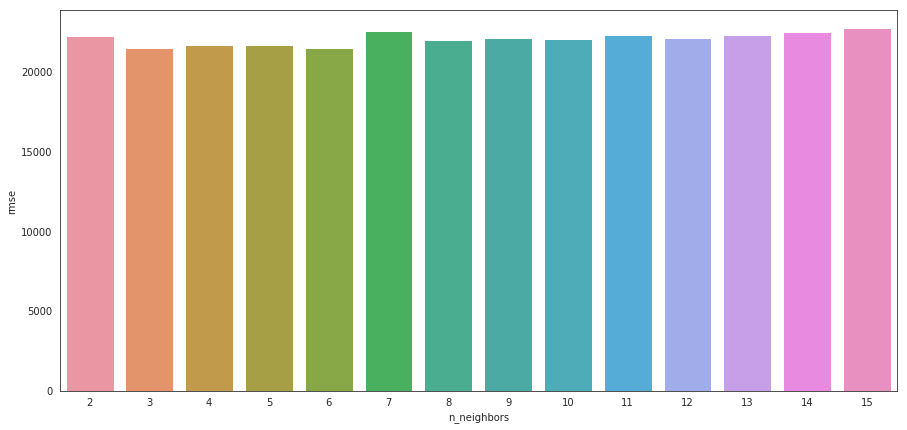

In [28]:
df_plt = pd.DataFrame()
df_plt['rmse'] = rmse_l
df_plt['n_neighbors'] = num
ax = plt.figure(figsize=(15,7))
seaborn.barplot(data = df_plt, x = 'n_neighbors', y = 'rmse')
plt.show()

# <FONT color="fuchsia">Descision Tree Regression</FONT>

<FONT size="4p">It appears that 3 nearest neighbors is the optimal number of neighbors.</FONT>

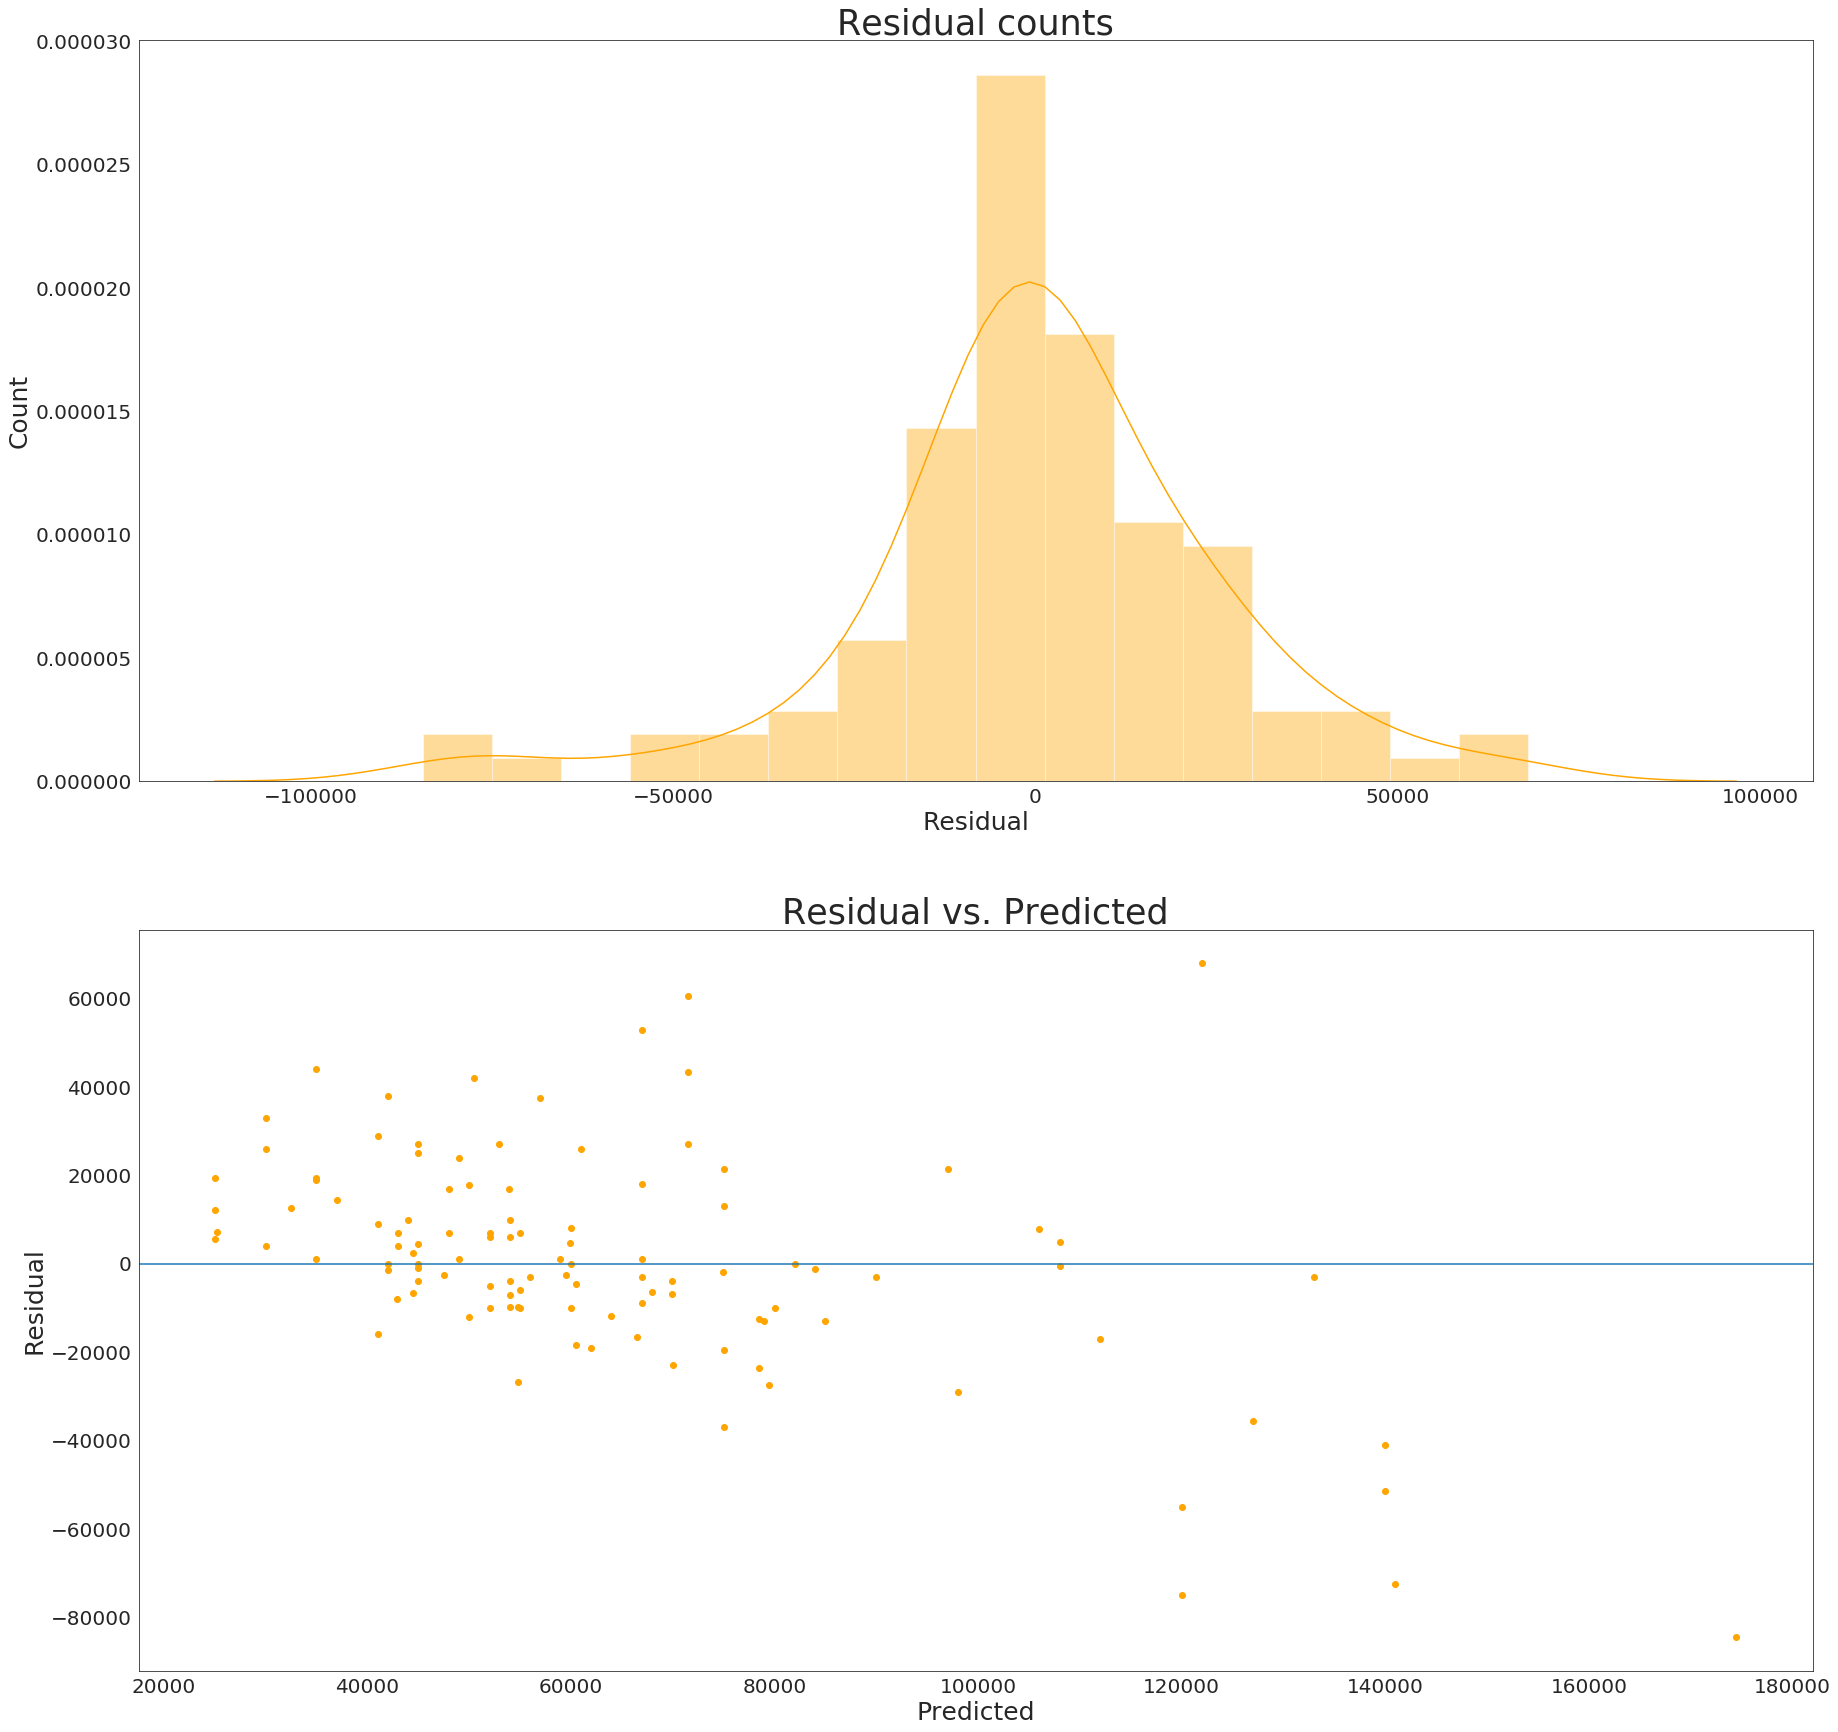

RMSE:
24532.282539358403


In [29]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_features='auto')
dtr.fit(X_train, Y_train)
predicted = dtr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
seaborn.distplot(residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [30]:
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.10


<FONT size="4p">The root-mean-square deviation (RMSD) or root-mean-square error (RMSE) (or sometimes root-mean-squared error) is a frequently used measure of the differences between values (sample and population values) predicted by a model or an estimator and the values actually observed. The RMSD represents the sample standard deviation of the differences between predicted values and observed values. These individual differences are called residuals when the calculations are performed over the data sample that was used for estimation, and are called prediction errors when computed out-of-sample. The RMSD serves to aggregate the magnitudes of the errors in predictions for various times into a single measure of predictive power. RMSD is a measure of accuracy, to compare forecasting errors of different models for a particular data and not between datasets, as it is scale-dependent. ~ WikiPedia
By comparing the Tree Regression with the KNN Regression we can see that the RMSE was augmented from 21493 to 25591 which let us say that this model is less accurate than the last one, we still have to test other regression algorithm to check if there is anyone better than those ones.</FONT>

# Interpretation

<FONT size="4p">By looking at the last RMSE score we've last improvements, as you can see from the "Residual vs. Predicted" that the predicted score is closer to zero and is tighter around the lines which means that we are guessing a lot closer to the price.</FONT>

# <FONT color="purple">What about Simple Linear Regression</FONT>

# <FONT color="fuchsia">Linear Regression</FONT>

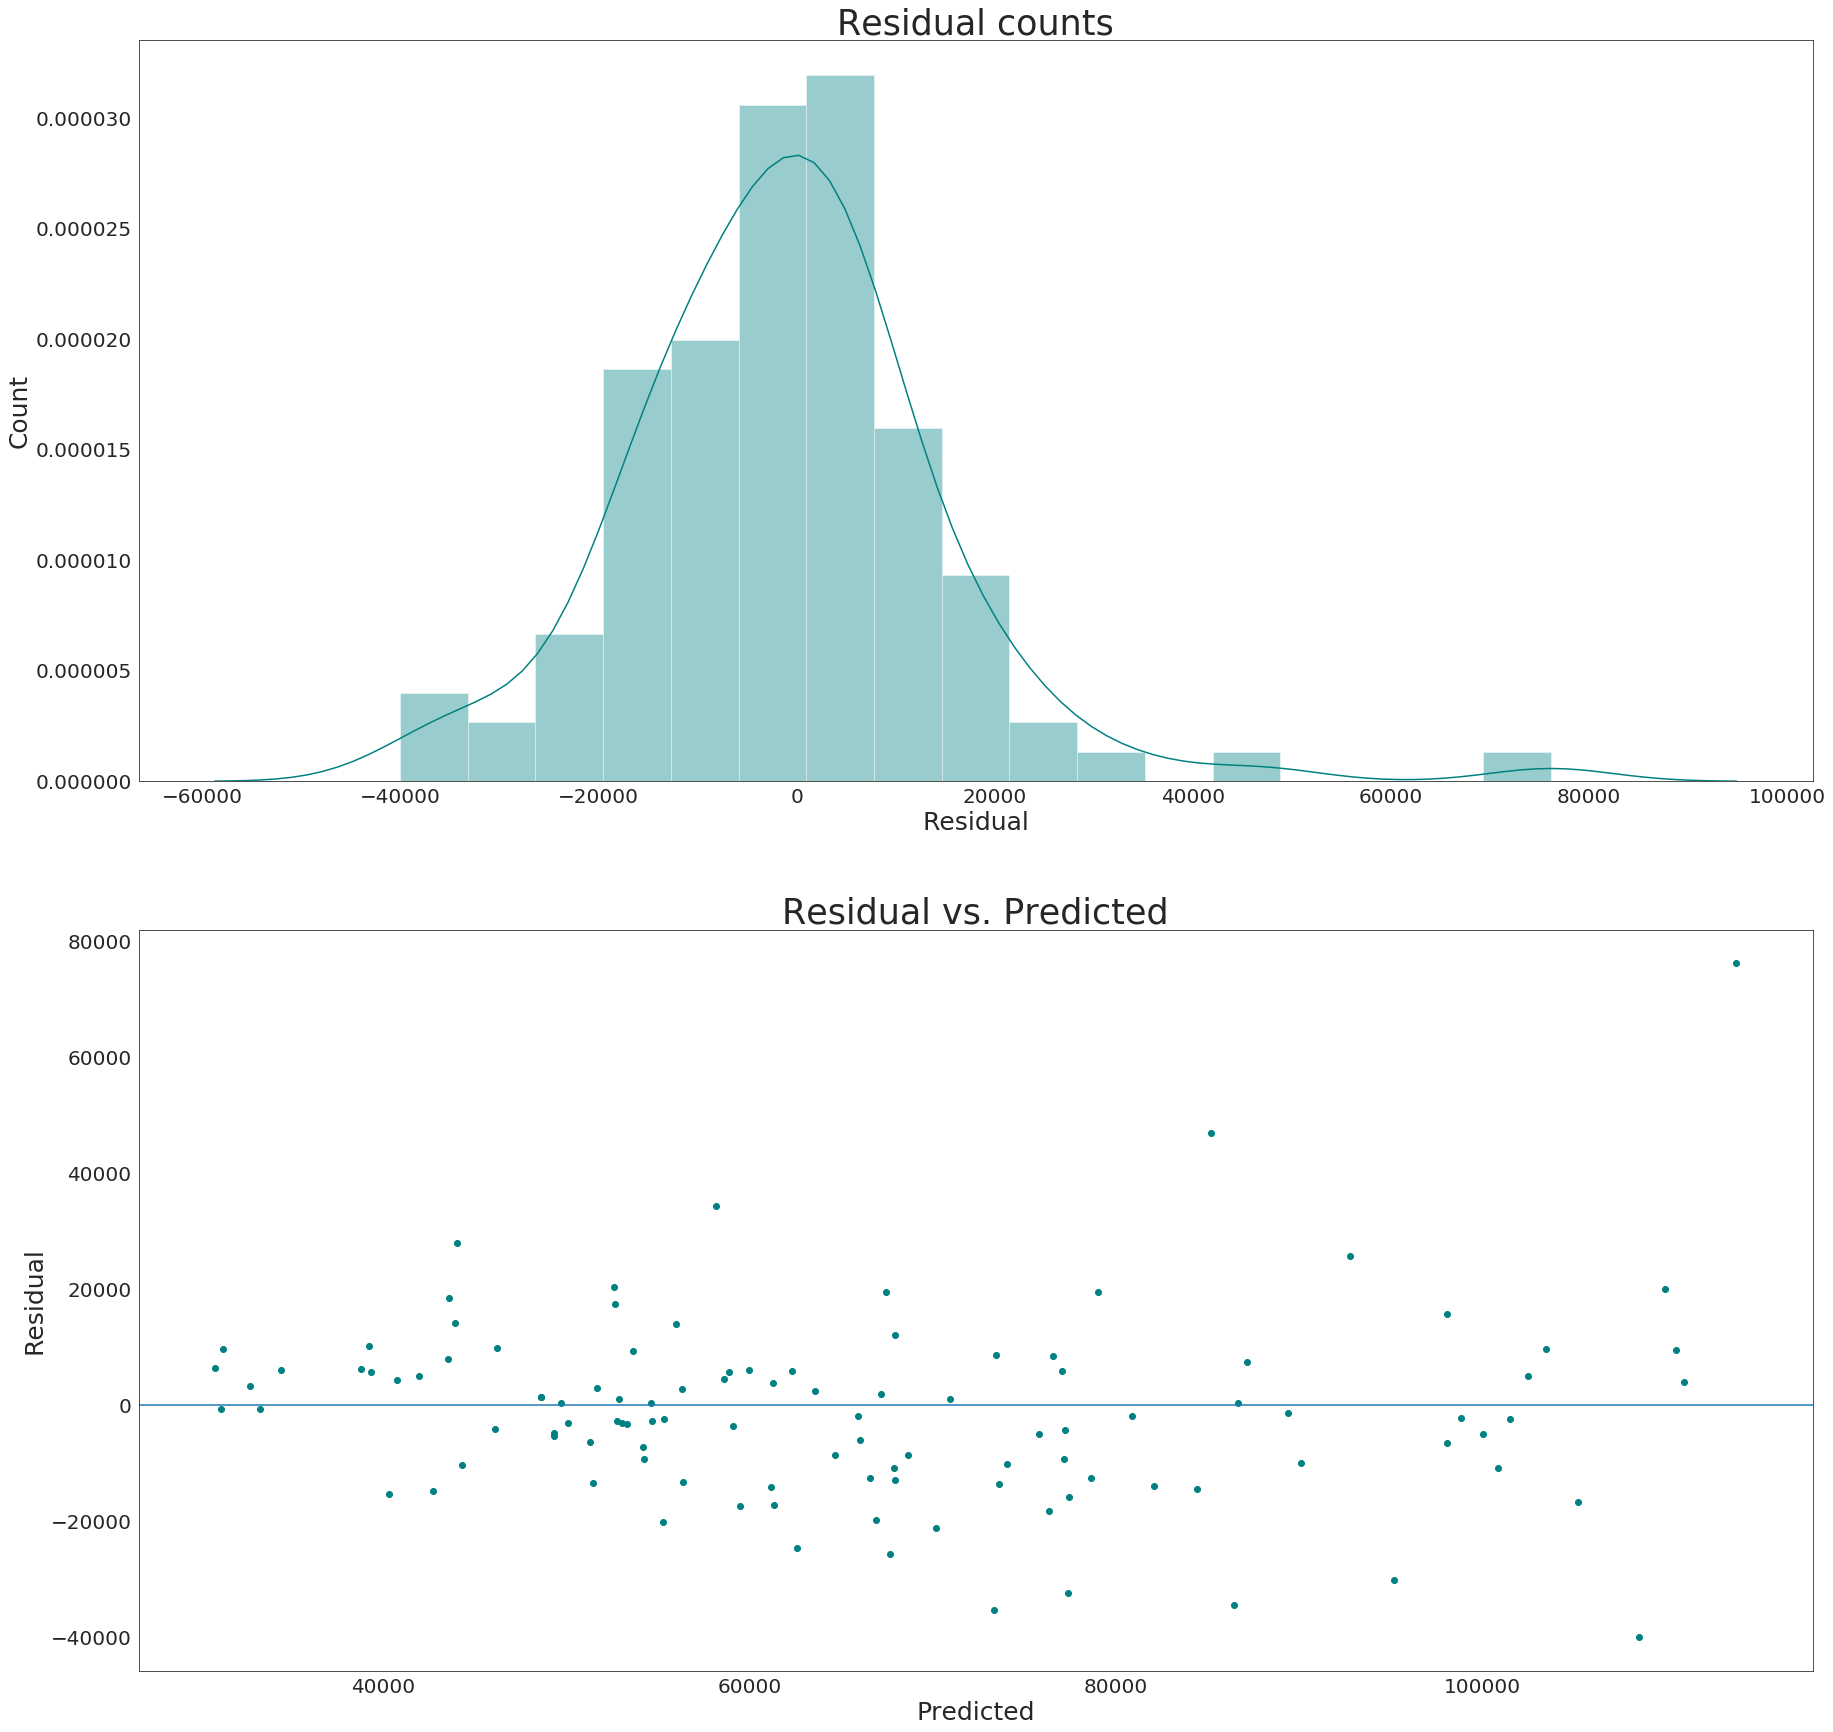

RMSE:
16016.397426383444


In [31]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

predicted = regr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
seaborn.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [32]:
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.62


<FONT size="10p">Boosting</FONT>

<FONT size="4p">Boosting is a machine learning ensemble meta-algorithm for primarily reducing bias, and also variance in supervised learning, and a family of machine learning algorithms which convert weak learners to strong ones. Boosting is based on the question posed by Kearns and Valiant (1988, 1989): Can a set of weak learners create a single strong learner? A weak learner is defined to be a classifier which is only slightly correlated with the true classification (it can label examples better than random guessing). In contrast, a strong learner is a classifier that is arbitrarily well-correlated with the true classification. ~ WikiPedia) 
Let's see if boosting can give us perfect scores.</FONT>

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

r_sq = []
deep = []
mean_scores = []

#loss : {‘ls’, ‘lad’, ‘huber’, ‘quantile’}
for n in range(3, 11):
    gbr = GradientBoostingRegressor(loss ='ls', max_depth=n)
    gbr.fit (features, prices)
    deep.append(n)
    r_sq.append(gbr.score(features, prices))
    mean_scores.append(cross_val_score(gbr, features, prices, cv=12).mean())

/usr/lib/python2.7/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


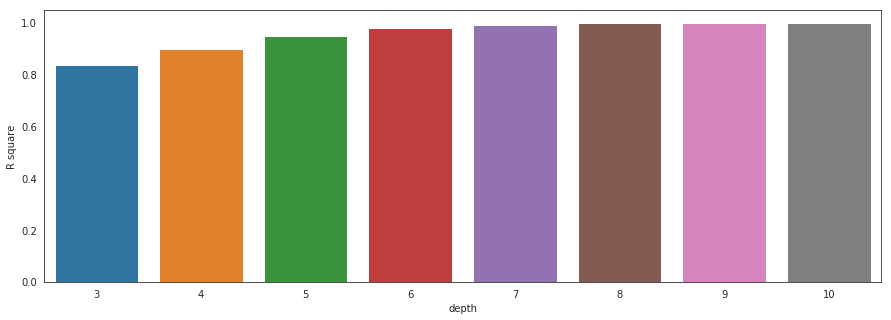

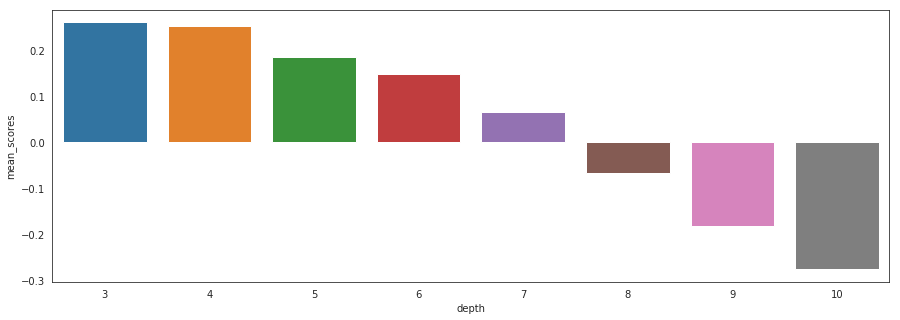

In [34]:
plt_gbr = pd.DataFrame()

plt_gbr['mean_scores'] = mean_scores
plt_gbr['depth'] = deep
plt_gbr['R square'] = r_sq

f, ax = plt.subplots(figsize=(15, 5))
seaborn.barplot(data = plt_gbr, x='depth', y='R square')
plt.show()

f, ax = plt.subplots(figsize=(15, 5))
seaborn.barplot(data = plt_gbr, x='depth', y='mean_scores')
plt.show()

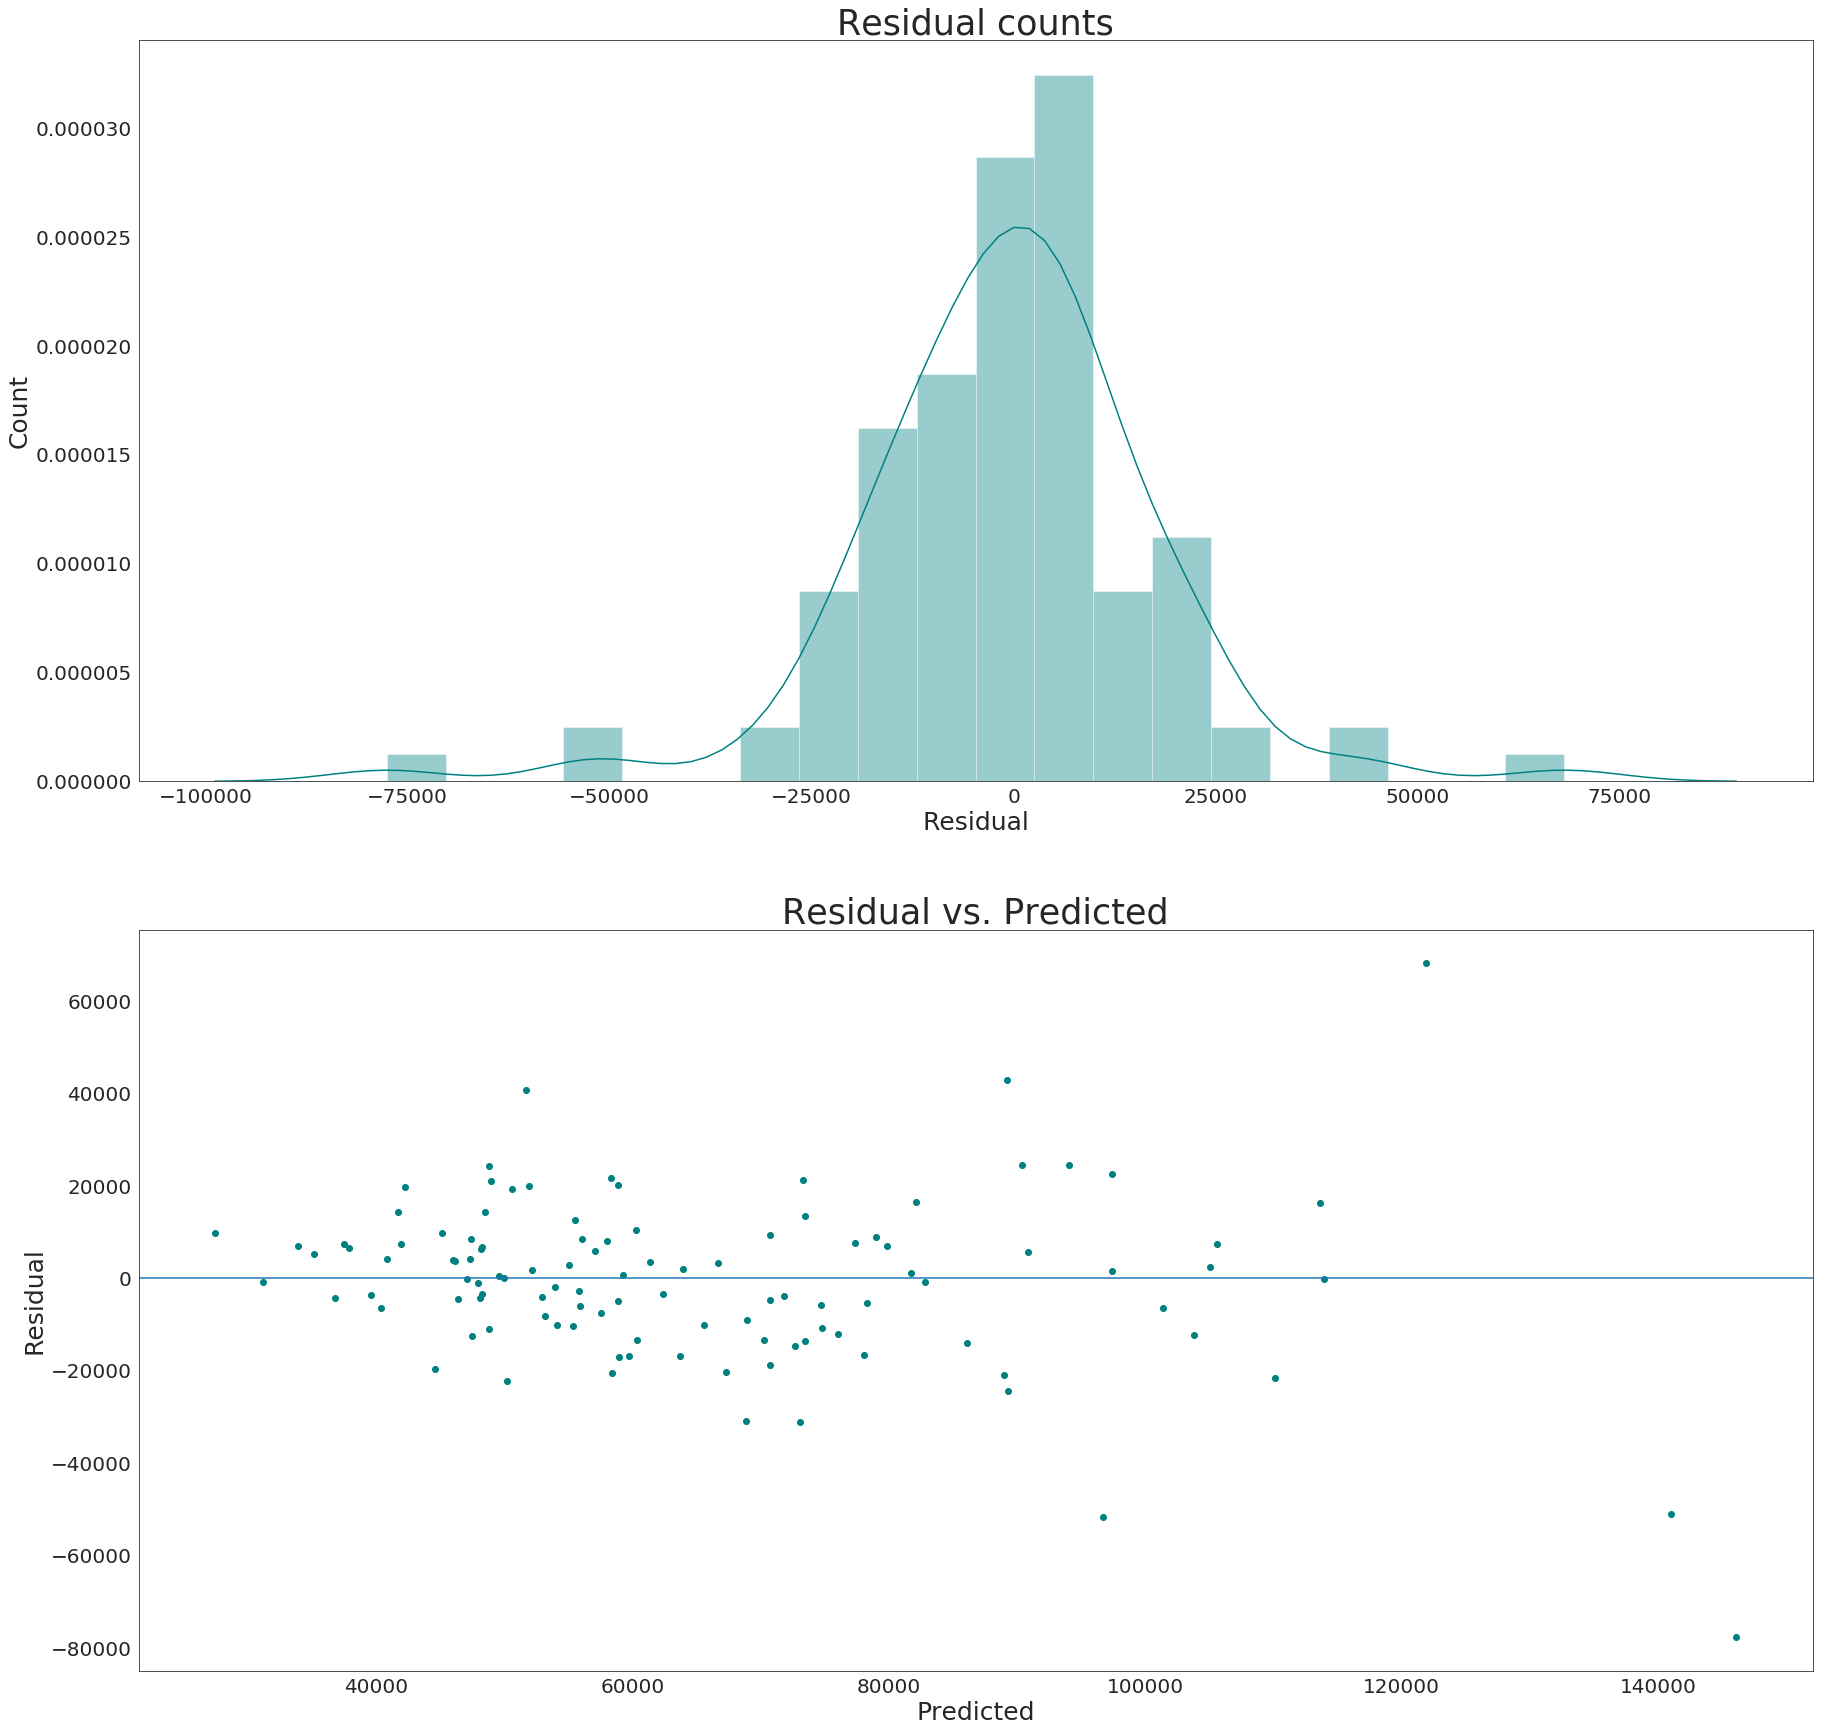


Cross Validation Scores:
[ 0.06774726 -0.05475646  0.33519331 -0.29111625  0.29468689 -0.18909033
  0.0266905   0.49567182 -0.22771091  0.56082175  0.61345495  0.1282162 ]

Mean Score:
0.1466507274630547

RMSE:
18192.00852356464


In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

gbr = GradientBoostingRegressor(loss ='ls', max_depth=6)
gbr.fit (X_train, Y_train)
predicted = gbr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
seaborn.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

rmse = np.sqrt(mean_squared_error(Y_test, predicted))
scores = cross_val_score(gbr, features, prices, cv=12)

print('\nCross Validation Scores:')
print(scores)
print('\nMean Score:')
print(scores.mean())
print('\nRMSE:')
print(rmse)

In [36]:
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.50


<G><I><FONT size="20">Model Evaluation</FONT></I></G>

<FONT size="4p">It appears that the Gradient Boosting model regressor win the battle with the lowest RMSE value and the highest R^2 score. In the following table we will do a benchmarking resuming all the models tested above.</FONT>

<table class='table table-striped'> <thead> <tr> <th>Model</th> <th>Variance Score</th> <th>RMSE</th></tr> </thead> <tbody> <tr> <th scope='row'>KNN</th> <td>0.31</td> <td>21684</td></tr> <tr> <th scope='row'>Multiple Linear Regression </th> <td>0.16</td> <td>24756</td></tr> <tr> <th scope='row'>Gradient Boosting	</th> <td>0.62</td> <td>16016</td></tr> 
<tr> <th scope='row'>Decision Tree</th> <td>0.50</td> <td>18260</td></tr></tbody> </table>

<FONT size="20p">Conclusion</FONT>

<FONT size="5p" color="blue">Let's predict an observation never seen before</FONT>

To do that we first build a fucntion that takes a simple user input and transform it to a one hot encoding.

In [52]:
# user_input = [5700, 2,2,1,0,1,0,1,0,1,1]
user_input = {'lotsize':5700, 'bedrooms':2, 'bathrms':2, 'stories':1, 'driveway':0,'recroom':1,'fullbase':0,
              'gashw':1,'airco':0,'garagepl':1,'prefarea':1}
def input_to_one_hot(features):
    # initialize the target vector with zero values
    enc_input = np.zeros(11)
    # set the numerical input as they are
    enc_input[0] = features['lotsize']
    enc_input[1] = features['bedrooms']
    enc_input[2] = features['bathrms']
    enc_input[3] = features['stories']
    enc_input[4] = features['driveway']
    enc_input[5] = features['recroom']
    enc_input[6] = features['fullbase']
    enc_input[7] = features['gashw']
    enc_input[8] = features['airco']
    enc_input[9] = features['garagepl']
    enc_input[10] = features['prefarea']
    return enc_input

In [53]:
print(input_to_one_hot(user_input))

[5.7e+03 2.0e+00 2.0e+00 1.0e+00 0.0e+00 1.0e+00 0.0e+00 1.0e+00 0.0e+00
 1.0e+00 1.0e+00]


In [54]:
a = input_to_one_hot(user_input)

In [55]:
price_pred = gbr.predict([a])

In [56]:
print("The predicted price of your house's characteristics is :", price_pred[0])

("The predicted price of your house's characteristics is :", 85851.70289911011)


# Save the best model

In [57]:
from sklearn.externals import joblib

joblib.dump(gbr, 'model.pkl')

['model.pkl']

In [58]:
gbr = joblib.load('model.pkl')

In [59]:
print("the best price for this house is",gbr.predict([a])[0])

('the best price for this house is', 85851.70289911011)


<FONT size="4p">Finally, our model is ready to be deployed and used.However, as we see even the gradient boosting is the best model for our dataset but it still have a low accuracy 62% which indicates that we can enhance our model in order to get higher score.To do that, first of all, to train the machine perfectly and have a very close prediction values to real ones we need to collect more data and have a rich dataset.Moreover, we can involve other factors (features) that can affect strongly house's price such as economic indicators : the housing market and the economy often reflect each other, so if things are not good economically, the housing market can also be slow. Moreover, we can add the local market : for example if your home is in excellent condition, in the best location, with quality finishes, the number of other properties for sale in your area can affect the value of your home. If there are a lot of buyers competing for a small number of homes, it's a sellers market. Conversely, a market with few buyers but many homes in the market is considered a buyer's market.</FONT>